# Классификация

### Литература

- [Ближайшие соседи - sklearn](http://scikit-learn.org/stable/modules/neighbors.html)
- [ODS классификация](https://habrahabr.ru/company/ods/blog/322534/#metod-blizhayshih-sosedey)
- [Семинары по машинному обучению, ВМК МГУ. kNN-1](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem02_knn.pdf)
- [Семинары по машинному обучению, ВМК МГУ. kNN-2](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem03_knn.pdf)
- [wiki: Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

## K ближайших соседей kNN

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

kNN - это метрический алгоритм, предполагающий, что объекты одного класса в пространстве находятся близко друг к другу. В зависимости от выбора k - количества ближайших соседей и метрики расстояния, качество может сильно отличаться. Страдает от проклятия размерностей. Ленивый, значит проивзодит все вычисления при предсказании, а не при обучении. Хранит всю тренировочную выборку в себе.

Идея алгоритма:
1. Взять новый объект и вычислить все расстояния по некоторой метрике от него до других объектов
2. Выбрать k ближайших соседей к этому объекту
3. Класс объекта - это класс наиболее часто встречающегося объекта среди k соседей.

В алгоритм можно внести изменение добавив веса для каждого объекта или класса. Например, при выборе класса смотрят не на большинство соседей, а на какую-то взвешенную сумму.

Кстати алгоритм можо свести к регрессии, если брать среднее значение целевой переменной по k соседям.

### Метод ближайших соседей в реальных задачах

- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди ближайших соседей человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются приближенными методами поиска ближайших соседей. Вот лекция Артема Бабенко про эффективные алгоритмы поиска ближайших соседей среди миллиардов объектов в пространствах высокой размерности (поиск по картинкам). Также известны открытые библиотеки, в которых реализованы такие алгоритмы, спасибо компании Spotify за ее библиотеку Annoy.

### Качество классификации методом ближайших соседей зависит от нескольких параметров:

- число соседей
- метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.
- веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

### sklearn.neighbors.KNeighborsClassifier

[Документация](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

Основные параметры класса sklearn.neighbors.KNeighborsClassifier:

- weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
- algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
- leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
- metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

_взято из курса [ODS](https://habrahabr.ru/company/ods/blog/322534/#metod-blizhayshih-sosedey)_

### Метрики расстояния

Аксиомы метрики:

1. $\rho(x,y) \ge 0$
2. $\rho(x,y) = \rho(y,x)$
3. $\rho(x,y) \ge \rho(x,z) + \rho(z,y)$

#### Евклидова метрика

$\large \rho(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$

#### Манхэттенская метрика

$\large \rho(x,y) = \sum_{i=1}^{n}{|x_i - y_i|}$

####  Минковского метрика

$\large \rho(x,y) = {(\sum_{i=1}^{n}{|x_i - y_i| ^ q})} ^ \frac{1}{q}$

#### Косинусная метрика

$\large \rho(x,y) = \arccos(\frac{\langle{x,y}\rangle}{\|x\|\|y\|}) = \arccos{\frac{\sum^d_{i=1}{x_i y_i}}{(\sum^d_{i=1}{x_i^2})^{1/2}(\sum^d_{i=1}{y_i^2})^{1/2}}}$

![](https://i.imgur.com/0aBH1bO.png)

### Масштаб признаков 

Исходя из формулы метрики расстояния между объектами в пространстве, можно сделать вывод, что масштаб признаков определяет их значимость. Например, умножим один из признаков на константу C. Тогда Евклидово расстояние примет вид: $$p_2(x,y) = \sqrt{C(x_1-y_1)^2+\sum_{i=2}^{d}{(x_i-y_i)^2}}$$ Таким образом, различие по первому признаку будет считаться в C раз более значимым, чем различия по всем остальным признакам. При этом расположение объектов относительно друг друга не изменилось - изменился лишь масштаб!

Если мы возьмем задачу, в которой измеряется рост в сантиметрах и вес в килограммах людей, и будем на этих данных предсказывать что-то, то рост будет всегда иметь большую важность, чем вес.  
Чтобы избежать проблему масштаба, признаки нужно нормировать. Это можно делать следующими способами: 

- Нормировка на единичную дисперсию: $\widetilde{x} = \frac{x - \overline{x}}{\sigma(x)}$
- Нормировка на отрезок [0,1]: $\widetilde{x} = \frac{x - min(x)}{max(x) - min(x)}$

### Проклятье размерности

Проблема заключается в невозможности эффективного поиска ближайших соседей для заданной точки в многомерном пространстве. Это происходит из-за того, что все объекты выборки равномерно распределены по d-мерной сфере и равноудалены друг от друга. Например, для kNN для 5 соседей и 5000 обхектов в выборке размерность должна быть не больше 10, чтобы решение было более менее эффективным. 

Подробнее об этом прочитайте в материалах к [Семинарам по машинному обучению, ВМК МГУ](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem02_knn.pdf).

![](https://i.imgur.com/VZkE79X.png)

$\LARGE \lim_{n \rightarrow \infty}{0.99^n} = 0$

Также будет полезно вспомнить, что такое скользящий контроль (кросс-валидация).

![image.png](https://habrastorage.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png)

Кратко: выборка разбивается на N равных частей, и проводится N экспериментов, причём для i-го эксперимента i-ая часть выборки не используется в обучении, но используется в предсказании для оценки обобщающей способности модели.

## Практика

### Классификация

Рассмотрим наш любимый датасет с цифрами MNIST. Мы его уже решали весьма успешно с помощью одного метрического алгоритма кластеризации, поэтому возможно тут тоже будет всё хорошо.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

In [2]:
from sklearn import datasets

# загружаем датасет с цифрами
X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


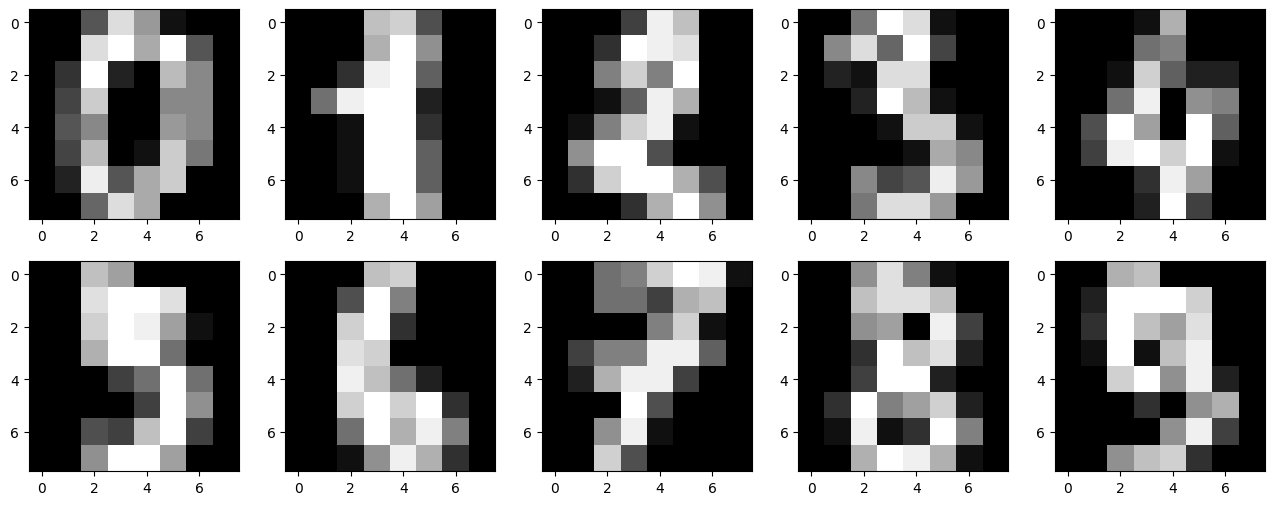

In [3]:
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([width,width]), cmap='gray')

Как мы с вами помним, классификацию по очень несбалансированным выборкам делать сложно и нужно брать специальные метрики и хитрые разбиения на трейн-тест. Посмотрим, как у нас дела обстоят с цирфами.

<Axes: ylabel='count'>

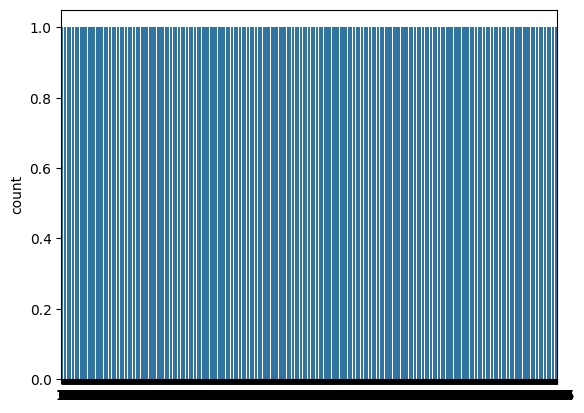

In [4]:
sns.countplot(y)

Реализуем kNN самостоятельно. Нам будет достаточно написать функцию вычисления класса. (почему? а как же обучение модели?)

Предлагаю Вам сделать так, чтобы метрику можно было менять. Проще всего сделать её аргументом функции.

In [5]:
def euclidian(x):  # норма в Евклидовом пространстве
    return np.sqrt(np.sum(np.power(x, 2), axis=1))

                   
def euclidian_metric(a, b):  # реализуем Евклидову метрику через норму
    return euclidian(a - b)

Далее реализуем функции, необходимые нам для вычисления класса по методу ближайших соседей.

1.Напишите функцию, которая по уже рассчитанным расстояниям от точек `y` до нашей точки (`distances`) находит и возвращает `k` ближайших соседей и соответствующие расстояния до них.

In [6]:
def _find_neighbours(k, y, distances):
    sort_order = np.argsort(distances)
    neighbours = y[sort_order][:k]    
    neighbours_distances = distances[sort_order][:k]
    return neighbours, neighbours_distances

In [7]:
# sanity check
Y = np.arange(10)
dist = np.linspace(1, 10, 10)
_find_neighbours(3, Y, dist)  # должен вернуться кортеж из массивов [0, 1, 2] и [1, 2, 3], если вернулось что-то другое, то что-то не так реализовано

(array([0, 1, 2]), array([1., 2., 3.]))

2.Реализуйте функцию, выделяющую преобладающий класс среди соседних объектов. Если есть конкурирующие классы, то нужно вернуть их все.

Конкурирующими считаются те классы, для которых количество принадлежащих им объектов равно между собой и при этом наибольшее среди всех классов, представленных в подвыборке.

**Hint:** используйте `np.unique`.

In [8]:
def _get_closest_classes(neighbours):
    classes, counts = np.unique(neighbours, return_counts=True)
    max_elem_index = np.argmax(counts)
    max_count = counts[max_elem_index]
    mask = counts == max_count
    best_classes = classes[mask]
    
    return best_classes

In [9]:
# sanity check
print(_get_closest_classes(np.asarray([1,2,3,2,2])))  # должна вернуться только "2"
print(_get_closest_classes(np.asarray([1,2,3,2,3])))  # должны вернуться "2" и "3"

[2]
[2 3]


3.Напишите функцию, которая выбирает наиболее подходящий класс, при условии, что есть несколько конкурирующих классов. Для этого будет необходимо посчитать среднее расстояние до объектов каждого класса и выбрать класс с наименьшим таким расстоянием.

In [10]:
def _choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = None

    for clazz in best_classes:
        current_class_mask = neighbours == clazz
        curent_mean_distance = neighbouring_distances[current_class_mask].mean()
        
        if curent_mean_distance < min_mean_dist:
            best_class = clazz
            min_mean_dist = curent_mean_distance

    return best_class

In [11]:
# sanity check
_choose_best_class([1,2], np.array([1, 2, 1, 3, 2]), np.asarray([0.5, 1, 1, 8, 0.6]))  # если всё правильно, best_class должен быть "1"

1

Далее нужно реализовать функцию, делающую предсказание для одной точки, используя реализованные ранее функции.

In [12]:
# эта функция будет считать расстояния от новой точки new_x до всех точек в исходном датасете X и на основе расстояний вычислять принадлежность к классу
def _nearest_neighbours_classify(x, y, k, new_x, metric):
    distances = metric(x, new_x)  # считаем расстояния до классов

    neighbours, neighbouring_distances = _find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
        
    best_classes = _get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей

    res = _choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей

    return res
        
# а в этой функции мы повторяем это всё для каждого элемента нашей выборки. Короче говоря, обрабатываем сразу батч (на самом деле не сразу, а по одной точке, медленно, но понятно).
def nearest_neighbours_classify(x, y, k, x_pred, metric=euclidian_metric):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)
    for i in range(x_pred.shape[0]):
        res[i] = _nearest_neighbours_classify(x, y, k, x_pred[i], metric)
    return res

Запустим в лоб наш классификатор kNN и посмотрим, какое качество он нам выдаст. Воспользуемся train_test_split, чтобы разбить данные на тренировочную и валидационную выборки.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

0.9861111111111112


Целевой признак распределен равномерно по всем классам с некоторой погрешностью. Поэтому можно считать в лоб обычную точность предсказания и не бояться, что интерпретация будет неадекватна. НО при кроссвалидации происходят случайные подвыборки объектов, а нам нужно особым образом стратифицировать разбиение, чтобы сохранялись пропорции классов. Для этих целей применяется стратификация.

Подробнее о стратификации вы можете [почитать тут](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html#stratification). 

Мы не будем реализовывать стратификацию самостоятельно (т.к. это очень муторно), а воспользуемся готовой реализацией из sklearn. Всё остальное возмём оттуда же, т.к. наш kNN сейчас идентичен тому, что в sklearn.
Для выделения стратифицированной выборки будем использовать [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

In [14]:
from sklearn.neighbors import KNeighborsClassifier # класс для kNN классификатора

from sklearn.model_selection import cross_val_score # метод для кросс-валидации данных

from sklearn.model_selection import KFold # алгоритм разбиения выборки на группы(фолды)
from sklearn.model_selection import StratifiedKFold # алгоритм разбиения выборки на стратифицированные группы(фолды)

Запустим в лоб классификатор kNN и посмотрим на качество на кроссвалидации при разбиении выборки на 5 фолдов со стратификацией.

In [15]:
clf = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

%time scores = cross_val_score(clf, X, y, cv=cv)

print("Accuracy: {}".format(scores.mean()))

CPU times: user 1.8 s, sys: 356 ms, total: 2.16 s
Wall time: 315 ms
Accuracy: 0.9871928195605078


Отлично, хорошая точность в 0.98, но где у нас сосредоточены ошибки? В чём проблема предсказания? Хотелось бы получить красивый отчет, вдруг мы просто неправильно предсказываем часть 1 и 7??

Воспользуемся функцией [classification-report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), которая выведет precision, recall, f1-score, support и confusion_matrix, по которой мы поймем что с чем путает алгоритм.

![](https://i.imgur.com/8xhLDz8.png)

$\LARGE precision = \frac{TP}{TP+FP}$

$\LARGE recall = \frac{TP}{TP+FN}$

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# разобъем датасет на train и test в пропорции 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
y_test = y_test.astype('int')

clf = KNeighborsClassifier()
clf.fit(X_train, y_train) # обучим модель
%time y_pred = clf.predict(X_test).astype('int') # предскажем тэги на тестовой подвыборке

CPU times: user 22.4 ms, sys: 10.3 ms, total: 32.7 ms
Wall time: 7.18 ms


In [17]:
print(classification_report(y_test, y_pred)) # напечатаем отчет о классификации

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.99      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.98      0.98        83
           6       0.99      1.00      0.99        69
           7       1.00      1.00      1.00        71
           8       1.00      0.98      0.99        65
           9       0.99      0.96      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



Построем [confusion матрицу](https://en.wikipedia.org/wiki/Confusion_matrix), для того, чтобы посмотреть какие классы путает алгоритм. При идеальном предсказании матрица должна быть диагональной. 

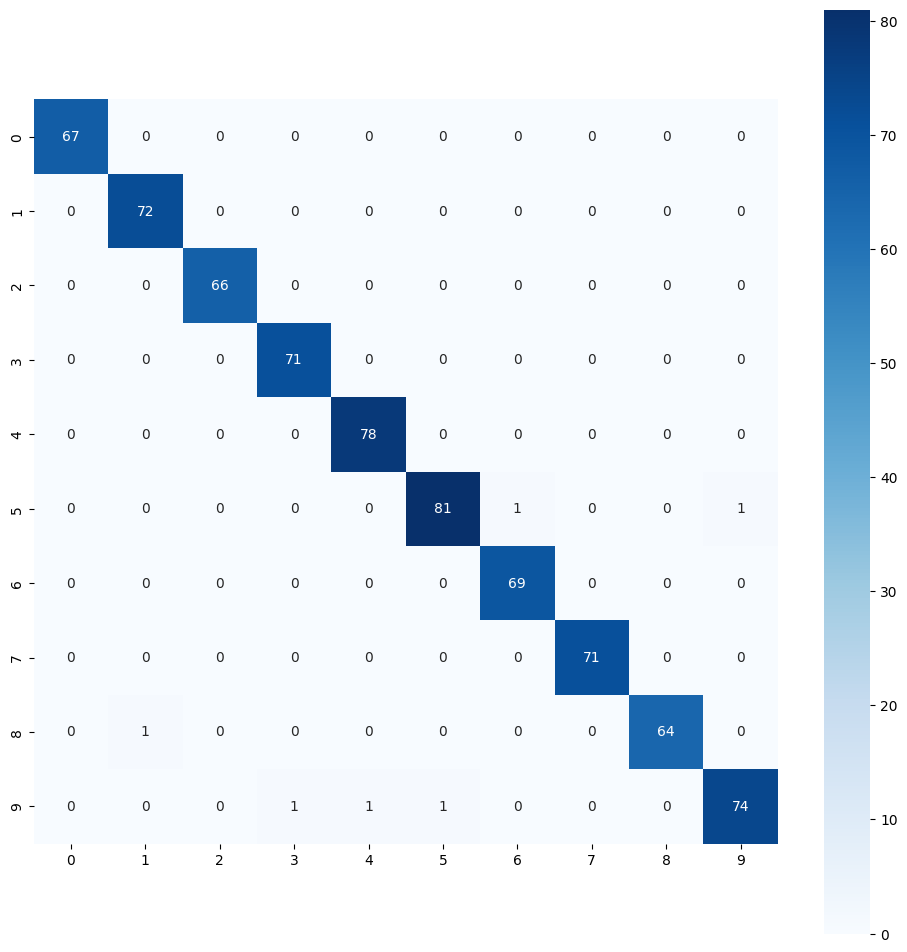

In [18]:
plt.figure(figsize=(12,12)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g')

На матрице видим, что влгоритм предсказывает часто 8, для 1. 9 для 7. 3 для 8. Возможно написания этих цифр действительно похожи.  
К сожалению мы обучались не на полном датасете, а на его части, причем с пониженной размерностью, поэтому результаты не столь живописны :)

### Тюнинг гиперпараметров

Как улучшить качество предсказания?

Самый просто способ для того чтобы подобрать лучший параметр - это перебрать их ВСЕ с помощью [GridSearch](http://scikit-learn.org/stable/modules/grid_search.html)

![](https://pp.userapi.com/c639616/v639616016/4938d/-9s9ffsvAC0.jpg)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Найдем значения `n_neighbors` и `p` при котором качество классификации на кроссвалидации максимально.

In [21]:
params = {
    "n_neighbors": np.arange(2, 10), 
    "p": [2,4]
}

search = GridSearchCV(KNeighborsClassifier(), params, n_jobs=2, 
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), verbose=2)
%time search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................n_neighbors=2, p=2; total time=   0.0s
[CV] END .................................n_neighbors=2, p=2; total time=   0.0s
[CV] END .................................n_neighbors=2, p=2; total time=   0.0s
[CV] END .................................n_neighbors=2, p=2; total time=   0.0s
[CV] END .................................n_neighbors=2, p=2; total time=   0.0s
[CV] END .................................n_neighbors=2, p=4; total time=   0.3s
[CV] END .................................n_neighbors=2, p=4; total time=   0.3s
[CV] END .................................n_neighbors=2, p=4; total time=   0.3s
[CV] END .................................n_neighbors=2, p=4; total time=   0.3s
[CV] END .................................n_neighbors=3, p=2; total time=   0.0s
[CV] END .................................n_neighbors=3, p=2; total time=   0.0s
[CV] END .................................n_neig

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [2, 4]},
             verbose=2)

BEST: score=0.9894227793252863, params={'n_neighbors': 3, 'p': 2}


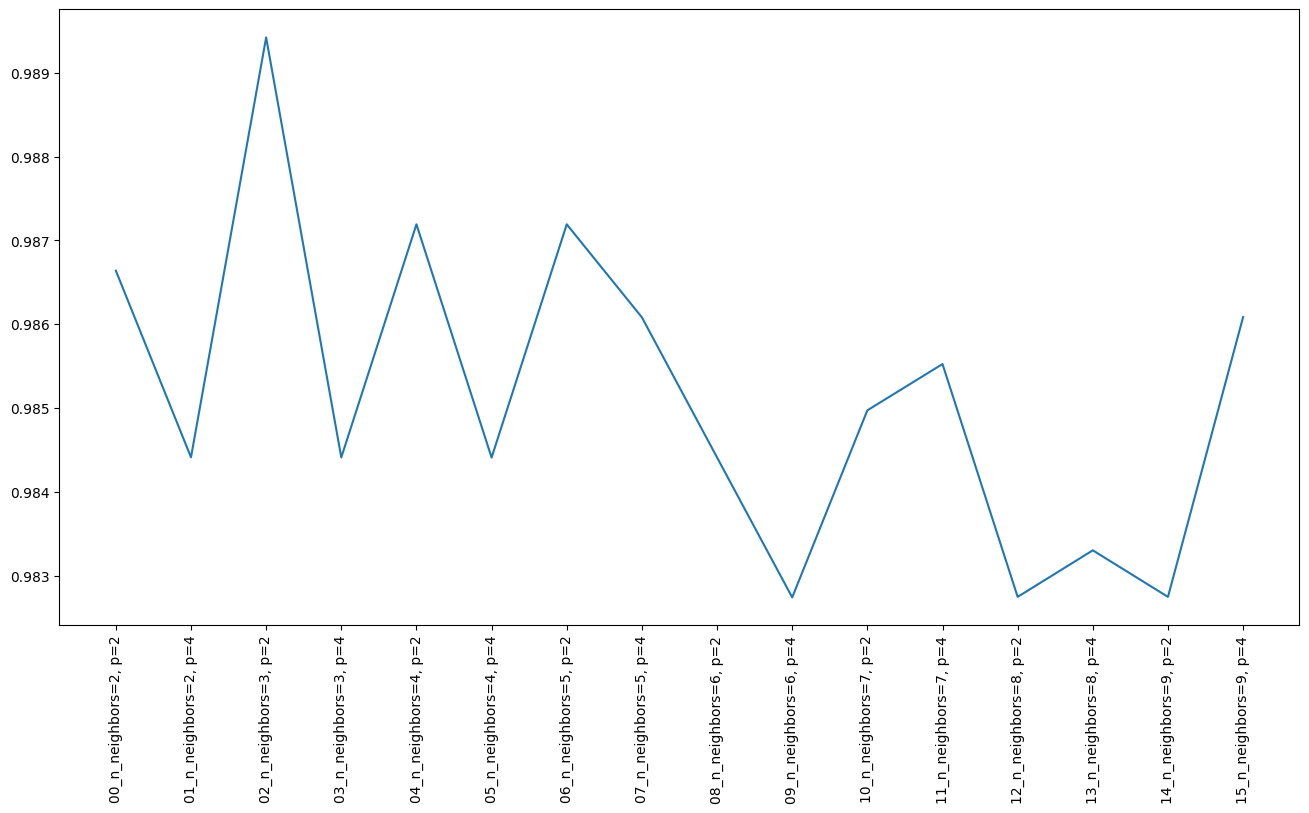

In [22]:
x_ticks = ["{:02d}_n_neighbors={}, p={}".format(i, p['n_neighbors'], p['p']) for i,p in enumerate(search.cv_results_['params'])]

plt.figure(figsize=(16,8))
plt.plot(x_ticks, search.cv_results_['mean_test_score'])
_ =plt.xticks(rotation=90)

print("BEST: score={}, params={}".format(search.best_score_, search.best_params_))

Посмотрим, стал ли лучше отчет классификации.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       1.00      0.99      0.99        71
           8       0.98      0.97      0.98        65
           9       0.99      0.95      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



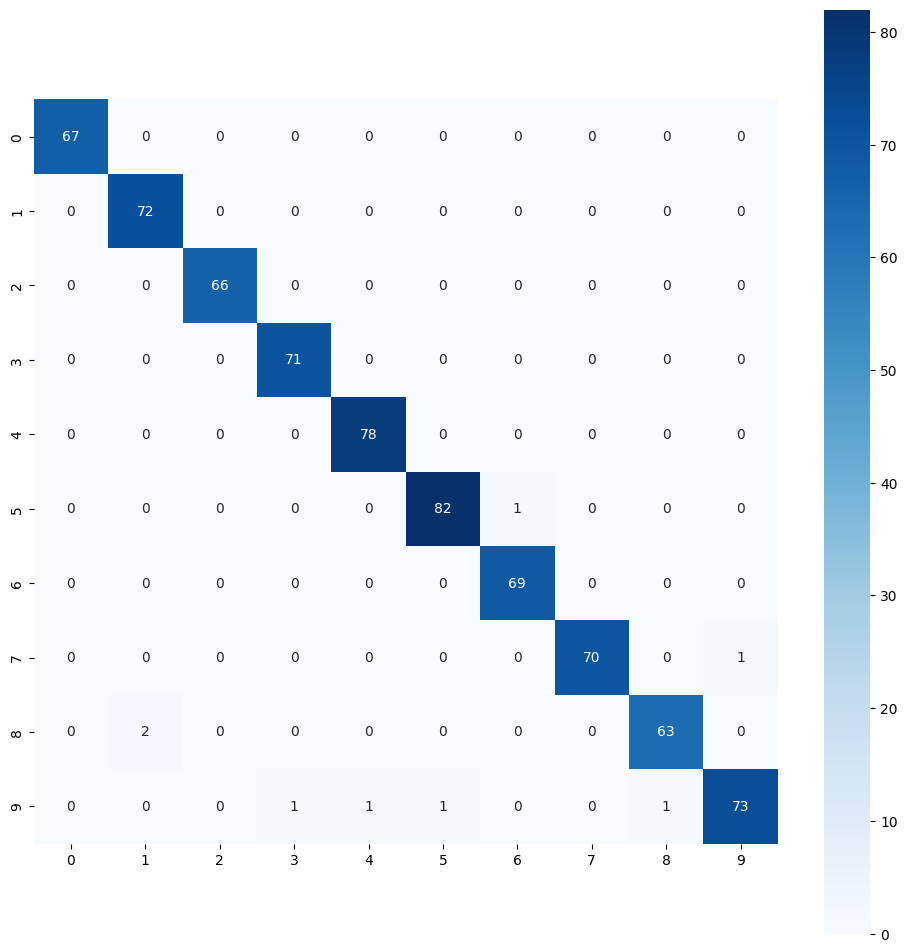

In [23]:
clf = KNeighborsClassifier(n_neighbors=3, p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype('int')

print(classification_report(y_test, y_pred))

plt.figure(figsize=(12,12))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.3g')

In [24]:
clf = KNeighborsClassifier(n_neighbors=3, p=2)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
%time scores = cross_val_score(clf, X, y, cv=cv)
print("Accuracy: {}".format(scores.mean()))
# с настройками по умолчанию было 0.9838396055603897

CPU times: user 66.9 ms, sys: 41.8 ms, total: 109 ms
Wall time: 24.9 ms
Accuracy: 0.9894227793252863


## Подбор гиперпараметров

Посмотрим на более наглядный пример подбора гипер параметров и важность масштабирования признаков.

Рассмотрим датасет с винишком: https://www.openml.org/d/187

In [26]:
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

In [27]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/dataset_191_wine.csv')
else:
    df = pd.read_csv('../data/dataset_191_wine.csv')
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
X = df.drop(['class'], axis=1)
y = df['class']

Переберем в лоб количество соседей `k`.

Best K = 1


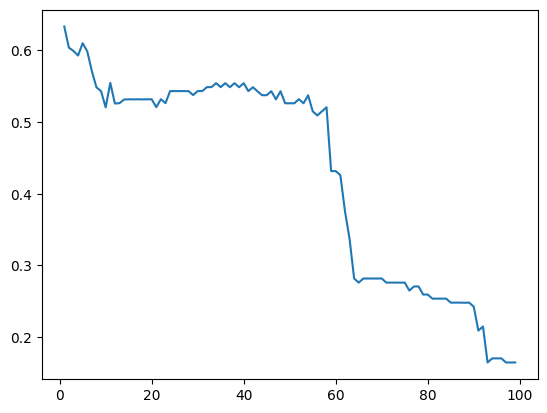

In [29]:
cv = KFold(n_splits=5, shuffle=False) # фиксируем разбиения! Выключаем перемешивание для повтора результатов

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean()
    for k in k_vals
]

print("Best K = {}".format(k_vals[np.argmax(quality_by_k)]))
plt.plot(k_vals, quality_by_k)

Наилучший результат при 1-м соседе? Выглядит как некоторая форма вырождения модели. 

Обратим внимание, что масштаб признаков очень разный. Необходимо нормировать признаки.

In [30]:
df.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Best K = 16


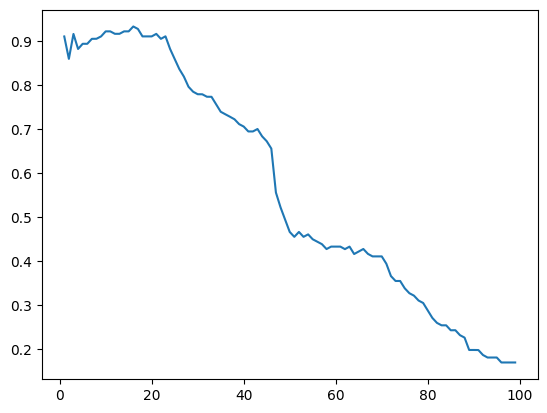

In [31]:
from sklearn.preprocessing import scale
X_scaled = scale(X) # включим масштабирование
cv = KFold(n_splits=5, shuffle=False)

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X_scaled, y, cv=cv).mean()
    for k in k_vals
]

print("Best K = {}".format(k_vals[np.argmax(quality_by_k)]))
plt.plot(k_vals, quality_by_k)

16 соседей - уже лучше. Да и качество стало не 0.65, а около 0.9 по accuracy.

Теперь подберем наилучшую метрику.

1.0


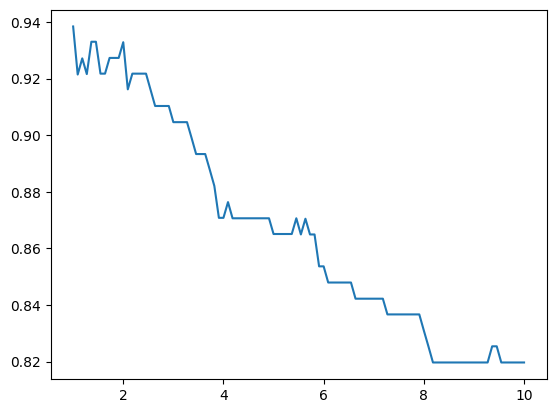

In [32]:
X_scaled = scale(X)
cv = KFold(n_splits=5, shuffle=False)

p_vals = np.linspace(1, 10, 100)
quality_by_p = [
    cross_val_score(KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=p), X_scaled, y, cv=cv).mean()
    for p in p_vals
]

print(p_vals[np.argmax(quality_by_p)])
plt.plot(p_vals, quality_by_p)

Победила манхэттенская метрика.